![title](header2.png)

# Misión
En esta prácticamos tendrás que calcular la marea sintética para el més de tu cumpleaños e identificar si naciste en marea viva o marea muerta. Además, tendrás que descargar datos satelitates para México y graficarlos. 

# Parte 1 - Mareas Terrestres
En está práctica harás uso del software, TSoft http://seismologie.oma.be/en/downloads/tsoft, para el cálculo de las mareas teórica. Ve el video siguiente video donde se explica como calcular la marea utilizando este programa. Antes de empezar cualquier programa es necesario importar las librerías que va a utilizar. En este caso haremos uso de dos librerías muy comúnes que son **`numpy`** y **`matplotlib`**. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
from scipy.interpolate import griddata

## Pasos
1. Genera el cálculo de la marea para el mes en que naciste en base al siguiente video https://youtu.be/9aZvNpm8XOQ. 
2. Genera un vector de tiempo de tal forma que el eje de las x- este en días. Se recomienda utilizar la función <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"> numpy.linspace</a>.
3. Grafica los datos e identifica visualmente el día en que nacisiste. Se recomienda utilizar la función <a href='https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html'>numpy.genfromtxt</a>.
**Tips: ** Recuerda que no vamos a utilizar la primera columna del archivo** expchan.dat. **Unicamente la segunda columna**.

**<font color='red'>Nota. Verifica que las unidades de la aceleración sean mGals. Tendrás que calcular el factor de conversión de nm/s^2 a mGals.</font>**

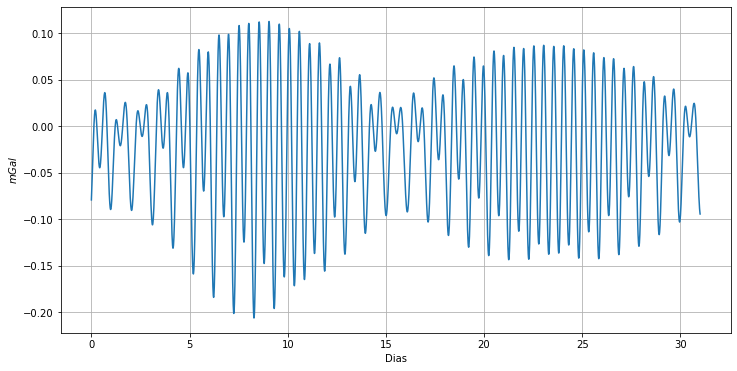

In [24]:
data = np.genfromtxt('expchan.dat')
fact = 1e-4
time = np.linspace(0,31,4464)
data = data[:,1]*fact 
fig, ax = plt.subplots(1,figsize=(12,6))
ax.plot(time, data)
ax.set_xlabel('Dias')
ax.set_ylabel(f'$mGal$')
plt.grid()

###  Posible solución.
![title](./sol1.png)
### Cuestionario
¿Naciste en marea viva o en marea muerta?

# Parte 2 - Datos de satélite
En esta parte vamos a descargar datos obtenidos a través de diferentes misiones satelitales. Para ello deberás de descargar los datos correspondientes de la página http://icgem.gfz-potsdam.de/tom_longtime. Esto te generará un archivo de 3 columnas, la primera con la longitud (x), la segunda con la latitud (y) y la tercera con el campo que hayas seleccionado graficar (geoide, gravedad, etc.). Abre este archivo con el editor de texto de tu preferencia, y verifica cuantas lineas forman el encabezado. 

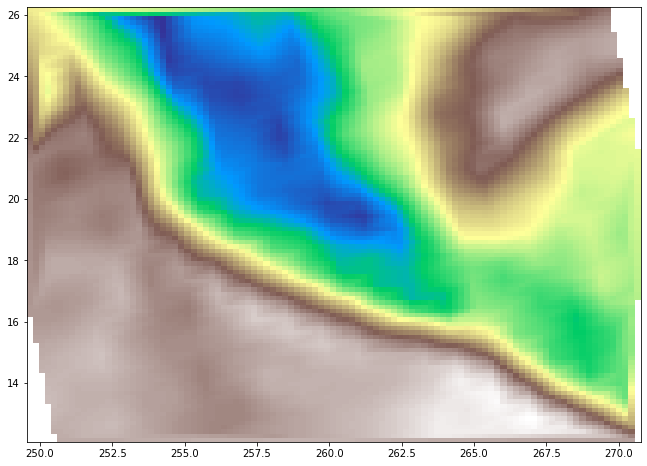

In [29]:
filename = 'grace.gdf'
header_lines = 37
data_gravedad = np.genfromtxt(filename,skip_header=header_lines)

# Utiliza las siguientes líneas en caso de que las dimensiones de tu arreglo 
# sean muy grandes
longitud = data_gravedad[1::200,0]
latitud  = data_gravedad[1::200,1]
z        = data_gravedad[1::200,2]

min_lon  = np.min(longitud)
max_lon  = np.max(longitud)
min_lat  = np.min(latitud)
max_lat  = np.max(latitud)


xi       = np.linspace(min_lon, max_lon, 101)
yi       = np.linspace(min_lat, max_lat, 101)
X, Y     = np.meshgrid(xi, yi)
zi = griddata((longitud,latitud),z,(X,Y), method='linear')
cmap = plt.get_cmap('turbo')
fig, ax = plt.subplots(1,figsize=(11,8))
ax.pcolormesh(xi, yi, zi, cmap='terrain', shading='auto')

### Posible solución
![title](./sol2.png)
**<font color='red'>Nota. Debido a que usamos una escala de colores diferente, tu mapa se verá distinto a como lo viste en la página del ICGEM.</font>